In [1]:
!pip install gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 3.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 5.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [2]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [4]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.7236376404762268), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545307636260986), ('cats', 0.6471933126449585), ('rabbit', 0.6468630433082581)]
0.87980753


Part 1a

In [21]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

word = 'bite'
similar_words = model.most_similar(word)

print(f"Most similar words to '{word}':")
for similar_word, similarity in similar_words:
    print(f"{similar_word}: {similarity}")

Most similar words to 'bite':
bites: 0.8291096091270447
tick: 0.6642047762870789
biting: 0.6515273451805115
mouth: 0.617926836013794
skin: 0.6066554188728333
bitten: 0.6057458519935608
eaten: 0.603766143321991
flesh: 0.5997360944747925
punch: 0.59884113073349
teeth: 0.5951068997383118


In [13]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))


[('paris', 0.8827143311500549), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174600601196), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526145935059)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475123882293701), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403281807899475)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392118573188782), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964332580566), ('pigs', 0.6755765080451965), ('animal', 0.6683686971664429)]


In [15]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)

[('menstruating', 0.6102039813995361), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693746566772), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.42151397466659546), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.40107354521751404), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661209940910339),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772218346595764),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586815714836121),
 ('medical', 0.6466937065124512)]

Part 1b

In [14]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

dimension_index = 0

words_to_modify = ['doctor', 'nurse', 'teacher', 'engineer', 'scientist']

modified_embeddings = {}
for word in words_to_modify:
    original_embedding = model[word]
    modified_embedding = original_embedding.copy()
    modified_embedding[dimension_index] += original_embedding[dimension_index]
    modified_embeddings[word] = modified_embedding

for word, embedding in modified_embeddings.items():
    similar_words = model.similar_by_vector(embedding)
    print(f"Most similar words to modified '{word}':")
    for similar_word, similarity in similar_words:
        print(f"{similar_word}: {similarity}")
    print()

Most similar words to modified 'doctor':
doctor: 0.9999681711196899
physician: 0.7667373418807983
nurse: 0.7518564462661743
dr.: 0.7167025804519653
doctors: 0.7081695199012756
patient: 0.7070759534835815
medical: 0.6996188759803772
hospital: 0.689971923828125
surgeon: 0.6890944242477417
psychiatrist: 0.6585639715194702

Most similar words to modified 'nurse':
nurse: 0.9996103048324585
doctor: 0.7510480284690857
nurses: 0.7370350360870361
physician: 0.6891285181045532
nursing: 0.6849812269210815
dentist: 0.6785371899604797
therapist: 0.6694684624671936
midwife: 0.6675474047660828
hospital: 0.6645215153694153
surgeon: 0.6633015275001526

Most similar words to modified 'teacher':
teacher: 0.996998131275177
student: 0.8119312524795532
school: 0.7571505904197693
teaching: 0.7563098669052124
taught: 0.7422683835029602
teachers: 0.7312586307525635
graduate: 0.7162258625030518
instructor: 0.7038424611091614
students: 0.6851344108581543
teaches: 0.6560587882995605

Most similar words to modifie

Part 2: Visualization and Embeddings in Space

In [35]:
!pip install scikit-learn
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 2.4 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 4.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 4.5 MB/s eta 0:00:00a 0:00:01


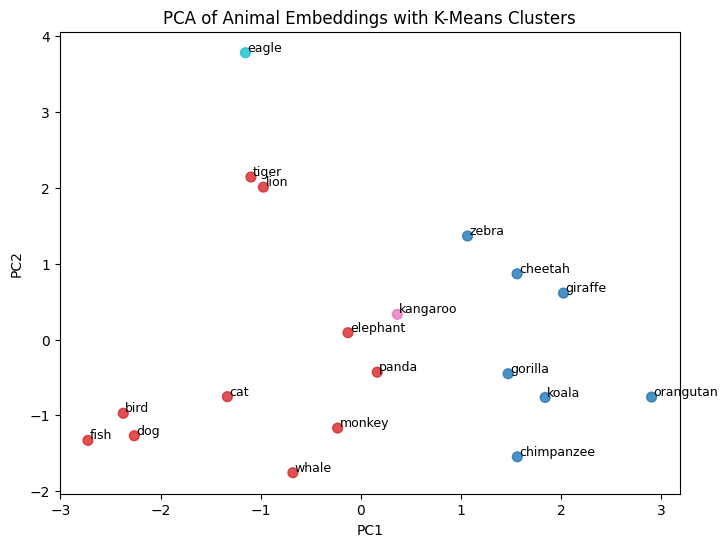

In [36]:
#visualize pca of word embeddings


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# your word list
words = [
  "dog","cat","fish","whale","bird","eagle","lion","tiger",
  "cheetah","elephant","giraffe","zebra","kangaroo","koala",
  "panda","monkey","gorilla","chimpanzee","orangutan",
]

# assume `model` is a word2vec/KeyedVectors or similar:
X = [model[word] for word in words]

# PCA down to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# K-Means clustering (choose number of clusters you like)
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels = kmeans.labels_

# Plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(
  X_pca[:,0], X_pca[:,1],
  c=labels, cmap='tab10', s=50, alpha=0.8
)
for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0]+0.02, X_pca[i,1]+0.02), fontsize=9)
plt.title("PCA of Animal Embeddings with K-Means Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


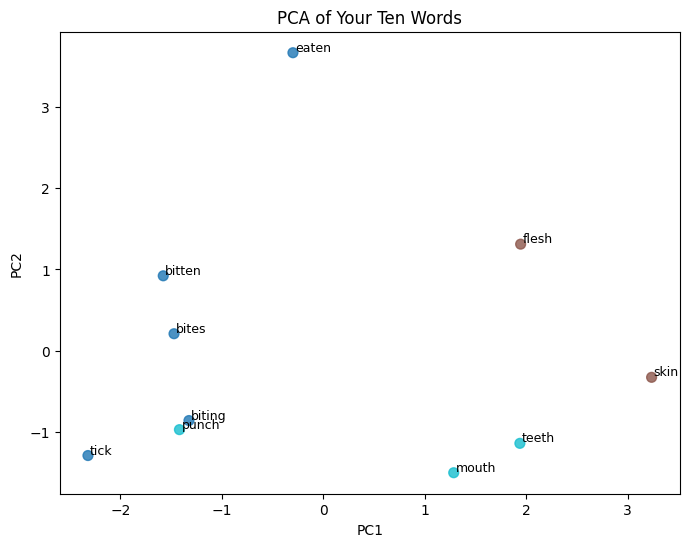

In [37]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# your word list (ignore the scores)
words = [
    "bites", "tick", "biting", "mouth", "skin", 
    "bitten", "eaten", "flesh", "punch", "teeth"
]

# get embeddings
X = [model[w] for w in words]

# PCA down to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Optional: cluster in original space
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_

# plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab10', s=50, alpha=0.8)
for i, w in enumerate(words):
    plt.annotate(w, (X_pca[i,0]+0.02, X_pca[i,1]+0.02), fontsize=9)
plt.title("PCA of Your Ten Words")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [40]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")


[==================================================] 100.0% 387.1/387.1MB downloaded


Part 3: Embedding reddit posts

In [42]:
import pandas as pd

In [43]:
#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [44]:
import pandas as pd


data = pd.read_csv("uiuc.csv")  

# 2. now you can clean & vectorize:
from sklearn.feature_extraction.text import CountVectorizer
import re

def clean_text(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    return text.lower()

data['cleaned_text'] = data['text'].apply(clean_text)

vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(data['cleaned_text'])

print(X_bow)


  (0, 4477)	2
  (0, 9268)	3
  (0, 8031)	1
  (0, 7291)	2
  (0, 876)	2
  (0, 4881)	1
  (0, 5474)	2
  (0, 4488)	1
  (0, 2895)	1
  (0, 8060)	1
  (0, 10055)	1
  (0, 10105)	1
  (0, 4214)	1
  (0, 9390)	2
  (0, 5461)	1
  (0, 8574)	1
  (0, 6481)	1
  (0, 8919)	1
  (0, 6622)	1
  (0, 10269)	1
  (0, 7587)	1
  (0, 9807)	1
  (0, 6533)	2
  (0, 7804)	1
  (0, 8956)	1
  :	:
  (4723, 3250)	1
  (4723, 574)	1
  (4723, 3673)	1
  (4723, 2233)	1
  (4723, 5309)	1
  (4723, 10211)	1
  (4723, 2071)	2
  (4723, 5716)	1
  (4723, 1627)	1
  (4723, 10192)	1
  (4723, 9712)	1
  (4723, 7224)	1
  (4723, 9213)	1
  (4723, 3774)	1
  (4723, 710)	1
  (4723, 3355)	1
  (4723, 9189)	1
  (4723, 2488)	1
  (4724, 5174)	1
  (4724, 10034)	1
  (4724, 4397)	1
  (4724, 9259)	1
  (4724, 4204)	1
  (4724, 2946)	1
  (4724, 9453)	1


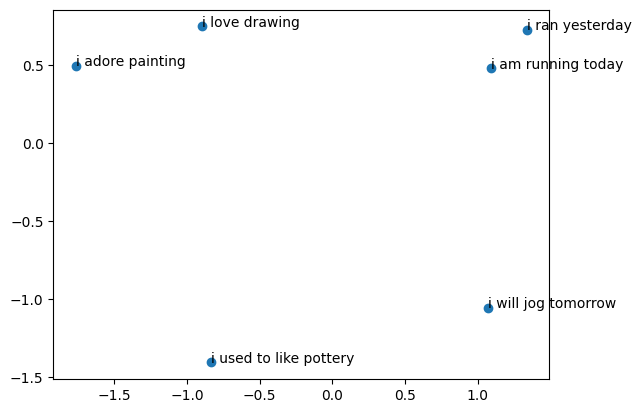

In [45]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 

import numpy as np
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]
avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [ ]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [46]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

data['avg_embedding'] = data['cleaned_text'].apply(lambda x: avg_embedding(x, model))

data = data.dropna(subset=['avg_embedding'])

embeddings = np.array(data['avg_embedding'].tolist())
labels = data['label'].values

pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Average Embeddings of Subreddit Posts')
plt.show()

/opt/anaconda3/envs/is310/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/is310/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


KeyError: 'label'

Part 4: HuggingFace and BERT

In [ ]:
!pip install transformers

In [100]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

c:\Users\lucia\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lucia\.cache\huggingface\hub\models--finiteautomata--bertweet-base-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [101]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

: 

In [ ]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label

In [ ]:
#look at ten sample posts and labels; do you agree with all of them? 

In [ ]:
#is the UIUC or Michigan subreddit more negative?